In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report


In [3]:
# load iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [4]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [5]:
# SVM with RBF kernel (default, good for nonlinear separation)
svm_model = SVC(kernel="rbf", C=1, gamma="scale")

# train
svm_model.fit(X_train, y_train)


SVC(C=1)

In [6]:
y_pred = svm_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=iris.target_names))


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [15]:
# Trying on Different kernel

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

kernels = ["linear", "poly", "rbf"]

for k in kernels:
    if k == "poly":
        model = SVC(kernel=k, degree=3)  # polynomial degree = 3
    else:
        model = SVC(kernel=k)

    # Train the model
    model.fit(X, y)   # here X and y are from iris dataset

    # Predict on same data (or use train/test split if you want)
    y_pred = model.predict(X)

    # Print results
    print(f"Kernel = {k}, Accuracy = {accuracy_score(y, y_pred):.4f}")



Kernel = linear, Accuracy = 0.9667
Kernel = poly, Accuracy = 0.9667
Kernel = rbf, Accuracy = 0.9533


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC

# Load iris dataset
iris = datasets.load_iris()
X = iris.data[:, 2:4]   # only petal length & petal width
y = iris.target

# Train SVM
svm_model = SVC(kernel='rbf', gamma='auto', C=1.0)
svm_model.fit(X, y)

# Create mesh grid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(
    np.arange(x_min, x_max, 0.02),
    np.arange(y_min, y_max, 0.02)
)


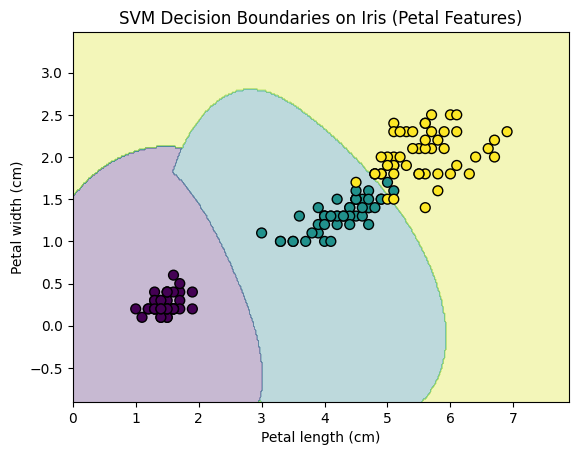

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.svm import SVC

# Load iris dataset
iris = datasets.load_iris()
X = iris.data[:, 2:4]   # only petal length & petal width
y = iris.target

# Train SVM
svm_model = SVC(kernel='rbf', gamma='auto', C=1.0)
svm_model.fit(X, y)

# Create mesh grid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(
    np.arange(x_min, x_max, 0.02),
    np.arange(y_min, y_max, 0.02)
)

# Predict on grid
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary + data points
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', s=50)
plt.xlabel('Petal length (cm)')
plt.ylabel('Petal width (cm)')
plt.title("SVM Decision Boundaries on Iris (Petal Features)")
plt.show()
